In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Capstone 
## Rental Business in Seattle

In [2]:
Z=pd.read_csv('https://data.seattle.gov/api/views/5a7u-vxx7/rows.csv?accessType=DOWNLOAD')

In [3]:
Z=Z.dropna(subset=['OriginalZip'])
Z.head()

,RegistrationNum,RegisteredTypeMapped,RegisteredTypeDesc,RentalHousingUnits,PropertyName,RegisteredDate,ExpiresDate,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,PropertyContactName,Link,Latitude,Longitude,Location 1
0,001-0134145,Rental Property,Registration,4,NaN,2018-06-19,2023-06-19,Active Registration,7327 38TH AVE NE,SEATTLE,WA,98115.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.682000,-122.288135,"7327 38TH AVE NE\nSEATTLE, WA 98115\n(47.68199..."
1,001-0126109,Rental Property,Registration,1,NaN,2016-09-16,2021-09-16,Active Registration,858 NW 65TH ST,SEATTLE,WA,98117.0,Jay Haskins,https://cosaccela.seattle.gov/portal/customize...,47.676170,-122.368106,"858 NW 65TH ST\nSEATTLE, WA 98117\n(47.6761696..."
2,001-0106534,Rental Property,Registration,1,7507,2015-06-09,2020-06-09,Active Registration,7507 19TH AVE SW,SEATTLE,WA,98106.0,David Rider,https://cosaccela.seattle.gov/portal/customize...,47.535239,-122.358541,"7507 19TH AVE SW\nSEATTLE, WA 98106\n(47.53523..."
3,001-0121106,Rental Property,Registration,1,NaN,2016-06-03,2021-06-03,Active Registration,1933 42ND AVE E,SEATTLE,WA,98112.0,David Drake,https://cosaccela.seattle.gov/portal/customize...,47.636730,-122.278775,"1933 42ND AVE E\nSEATTLE, WA 98112\n(47.636730..."
4,001-0134143,Rental Property,Registration,1,Bungalow Court,2018-06-19,2023-06-19,Active Registration,345 16TH AVE,SEATTLE,WA,98122.0,Brian Bannon,https://cosaccela.seattle.gov/portal/customize...,47.605651,-122.311972,"345 16TH AVE\nSEATTLE, WA 98122\n(47.60565109,..."


## The file used for analysis is the list of registered rental business.
Though there are several columns in this file, the main columns that I would want to use will be as below
>  RegisteredDate: The day that the rental business was registered<br />
>  OriginalZip   : The ZIP code for the rental business<br />
>  Latitude &amp; Longitude: The definite location


##  ZIP code 
Starting with the ZIP code, I would like to know where in Seattle has the largest density of rental business. On the other hand, where in Seattle have the smallest density is something I also want to find out<br />
To answer the question following steps will be apply:
> 1.  Look into the distribution of all the ZIP code and decide the upper and lower limit.<br />
> 2.  Seperately, I will look at both the ones that have many rental business and the ones that have less.<br />
> 3.  Then, using the Latitude &amp; Longitude, I will plot it on the map and see directly where those businesses are<br />

### Creating a barplot and look at the full image of Seattle rental business

Text(0.5,1,'Rental Business in different Zip code of Seattle area')

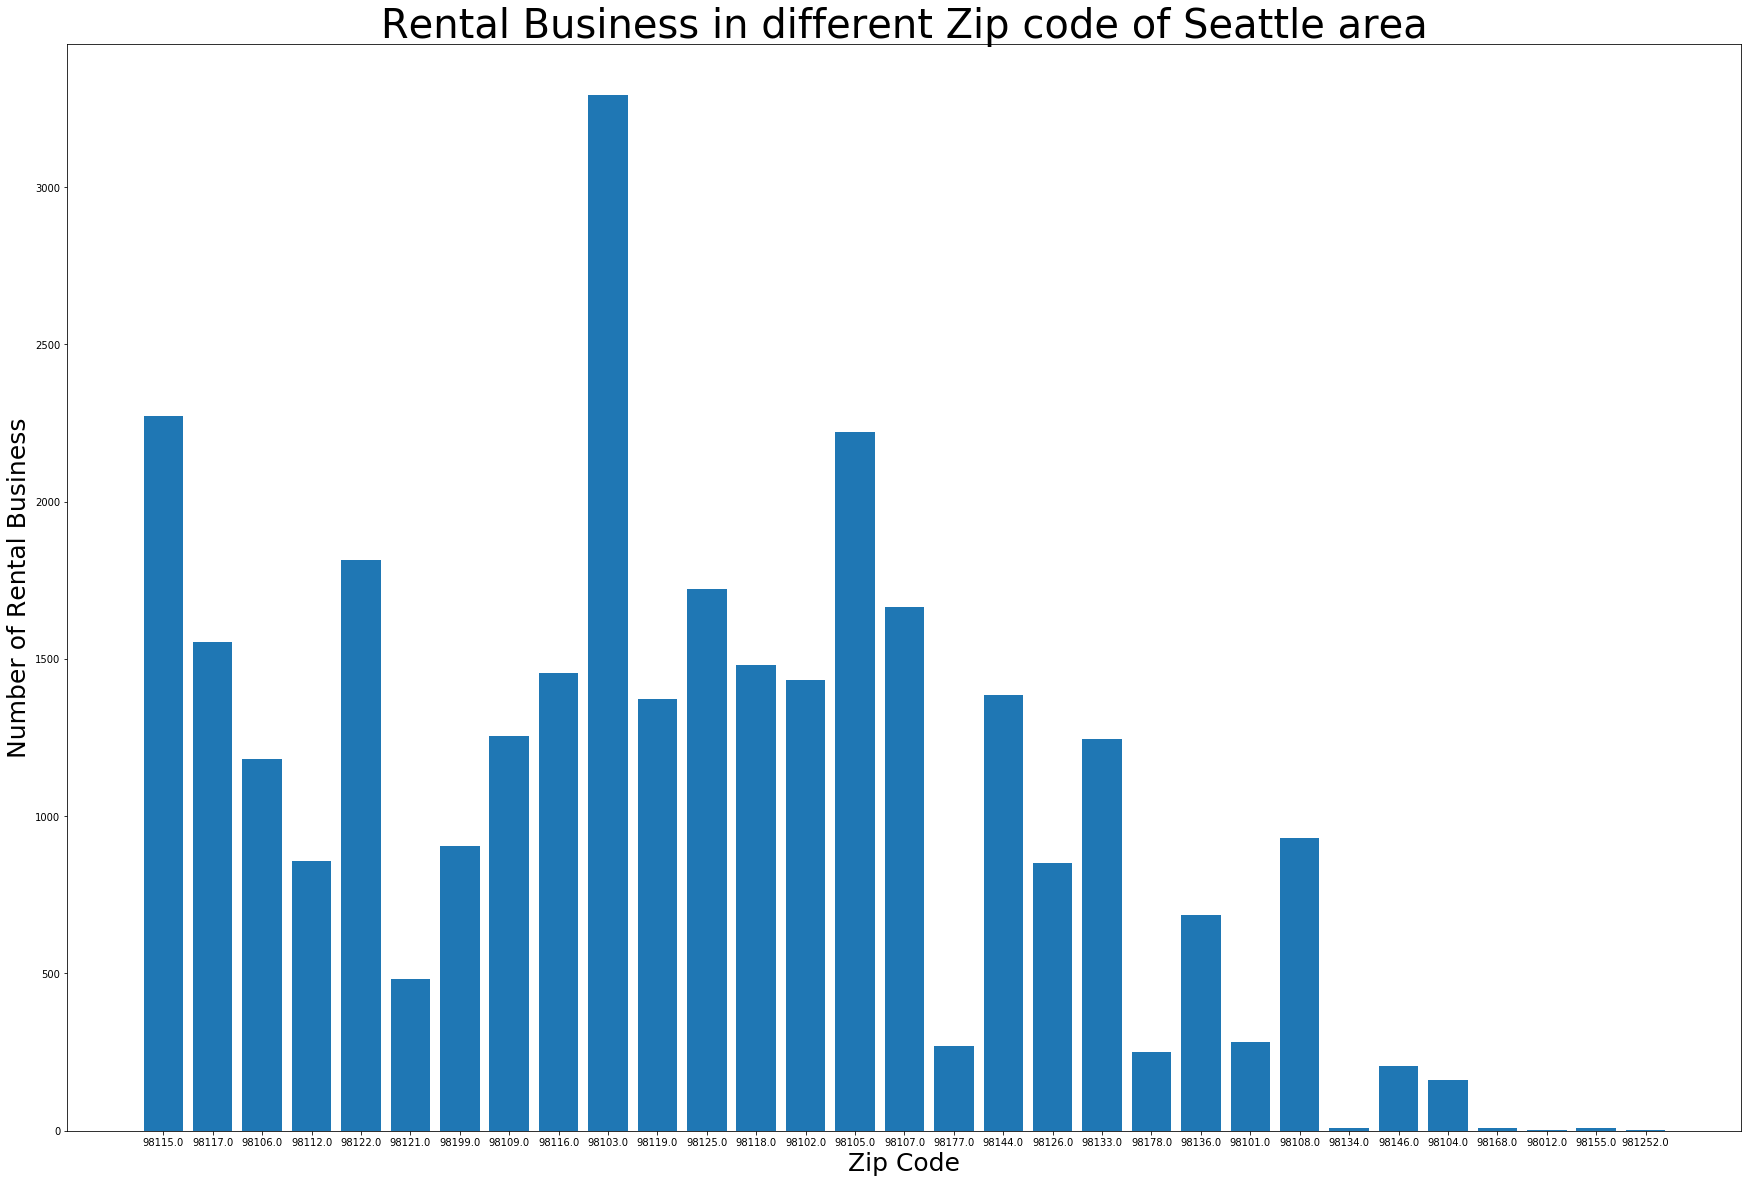

In [4]:
Zip=Z.OriginalZip.dropna()
Allcode=list(Zip.unique())
test=list(Zip.dropna())
C=[]
i=0
while i < len(Allcode):
    a=test.count(Allcode[i])
    C.append(a)
    i=i+1
AllcodeN=Zip.unique().astype(str)
plt.figure(figsize=(30,20))
plt.bar(AllcodeN, C, 0.8)
plt.xlabel('Zip Code',fontsize=25)
plt.ylabel('Number of Rental Business',fontsize=25)
plt.title('Rental Business in different Zip code of Seattle area',fontsize=40)

#### Looking at the plot, I see that the numbers are highly distributed. Since I only want to learn about the outliers, 1st and 3rd quartiles is the tool I would use.<br />

In [5]:
Bounder = np.percentile(C, [25, 75])
print('The first quatile is {0}, The third quartile is {1}'.format(Bounder[0],Bounder[1]))

The first quatile is 259.5, The third quartile is 1467.5


#### Applying the information from above, the boundary will be set as 300 &amp; 1500.

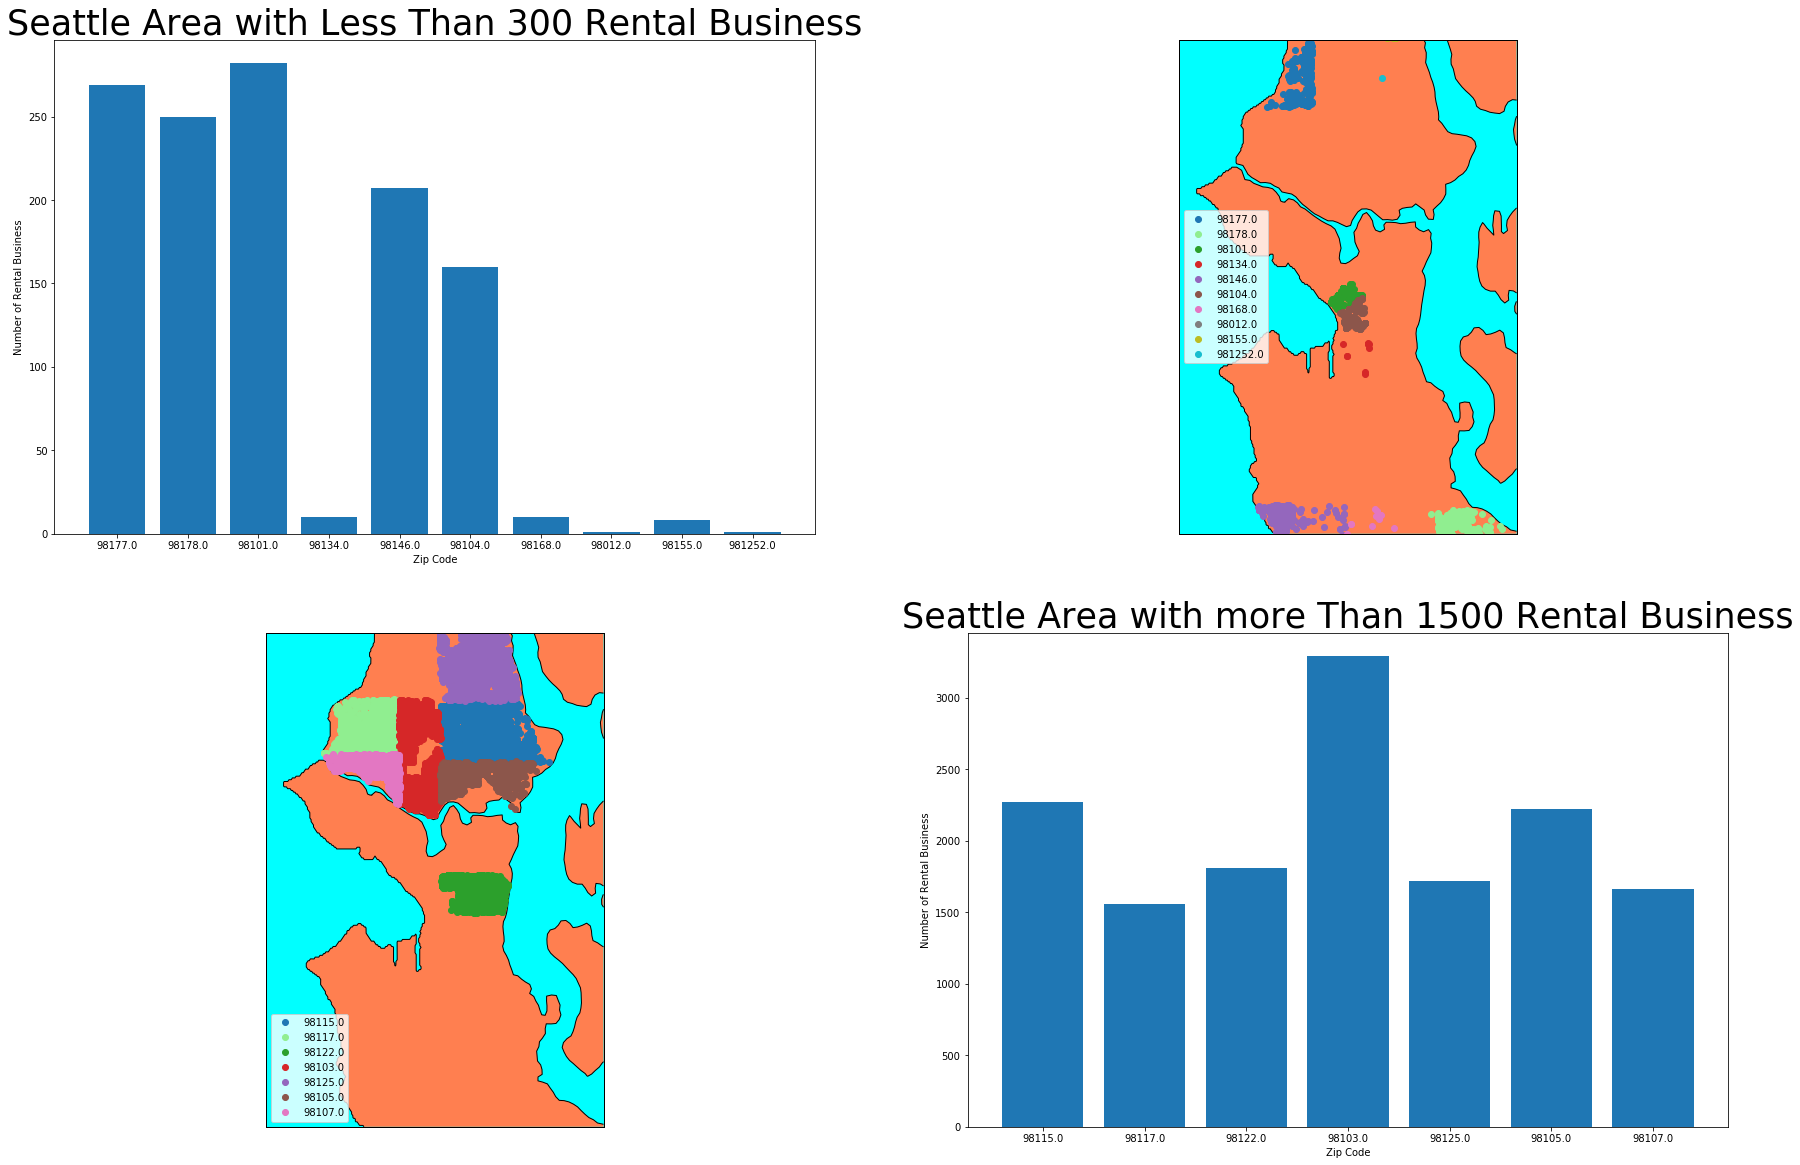

In [6]:
Z.OriginalZip = Z.OriginalZip.astype(str)
Rentalless300 = {'Zip': AllcodeN, 'numb': C}
Rentalless300 = pd.DataFrame(data=Rentalless300)
Rentalless300 = Rentalless300[Rentalless300.numb<300]
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.bar(Rentalless300.Zip, Rentalless300.numb, 0.8)
plt.xlabel('Zip Code')
plt.ylabel('Number of Rental Business')
plt.title('Seattle Area with Less Than 300 Rental Business',fontsize=35)
#-----------------------------------------------------------
plt.subplot(2,2,2)
m = Basemap(resolution='f',projection='merc',llcrnrlon=-122.450032, llcrnrlat= 47.500582, urcrnrlon=-122.214925, urcrnrlat=47.732752)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='blue')
m.drawcoastlines()
i=0
for o in Rentalless300.Zip:
    Lat = Z[Z['OriginalZip']==o].Latitude.values
    Lon = Z[Z['OriginalZip']==o].Longitude.values
    if i<10:
        if i==1:
            Col='lightgreen'
        else:
            Col='C{}'.format(i)
    if i>=10:
        Col='silver'
    x,y = m(Lon, Lat)
    m.plot(x, y, color=Col,marker='o',linestyle='None', markersize=6,label=o)
    i=i+1
plt.legend(Rentalless300.Zip)
#-----------------------------------------------------------
Rentalmore1500 = {'Zip': AllcodeN, 'numb': C}
Rentalmore1500 = pd.DataFrame(data=Rentalmore1500)
Rentalmore1500 = Rentalmore1500[Rentalmore1500.numb>1500]
plt.subplot(2,2,4)
plt.bar(Rentalmore1500.Zip, Rentalmore1500.numb, 0.8)
plt.xlabel('Zip Code')
plt.ylabel('Number of Rental Business')
plt.title('Seattle Area with more Than 1500 Rental Business',fontsize=35)
#---------------------------------------------------------
plt.subplot(2,2,3)
m = Basemap(resolution='f',projection='merc',llcrnrlon=-122.450032, llcrnrlat= 47.500582, urcrnrlon=-122.214925, urcrnrlat=47.732752)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='blue')
m.drawcoastlines()
i=0
for o in Rentalmore1500.Zip:
    Lat = Z[Z['OriginalZip']==o].Latitude.values
    Lon = Z[Z['OriginalZip']==o].Longitude.values
    if i<10:
        if i==1:
            Col='lightgreen'
        else:
            Col='C{}'.format(i)
    if i>=10:
        Col='silver'
    x,y = m(Lon, Lat)
    m.plot(x, y,color=Col,marker='o',linestyle='None', markersize=6,label=o)
    i=i+1
plt.legend(Rentalmore1500.Zip)

#### From the plots above, I have some findings. 
##### Area with Less Than 300 Rental Business:<br />
>First, I see that the areas that are on the very South part of the Seattle has less rental business.I asssume that it is due to inconvenience of getting to downtow. Also, surprisingly, I see that downtwon area around the Pike Place Market also has less rental business. So I looked into the area. I found that these areas are Finacial Areas which most of the buildings are offices.<br />
##### Area with More Than 1500 Rental Business:<br />
>I see that these areas are most likey be in the North part of Seattle. One of the reason I think of is the location of University of Washighton. To support the students, numerous of rental business popped out in these areas.

## After looking at where the businesses located, I would like to research in the time they register. Furthermore, I hope to conduct a model that can predict where they are going to register by looking at when they registered. 

## Time
#### From the column 'RegisteredDate', I want to create new columns that each contains the moth, the year, the both month and year

In [4]:
Z['RegisteredYear']=Z['RegisteredDate'].str.split('-',expand=True)[0]
Z['RegisteredMonth']=Z['RegisteredDate'].str.split('-',expand=True)[1]
Z['Registeredtime']=Z['RegisteredYear']+'-'+Z['RegisteredMonth']

In [5]:
Year=Z.groupby('RegisteredYear').size()
Month=Z.groupby('RegisteredMonth').size()
Time=Z.groupby('Registeredtime').size()

Text(5,3,'words, I think the trend is due to the expiring time.')

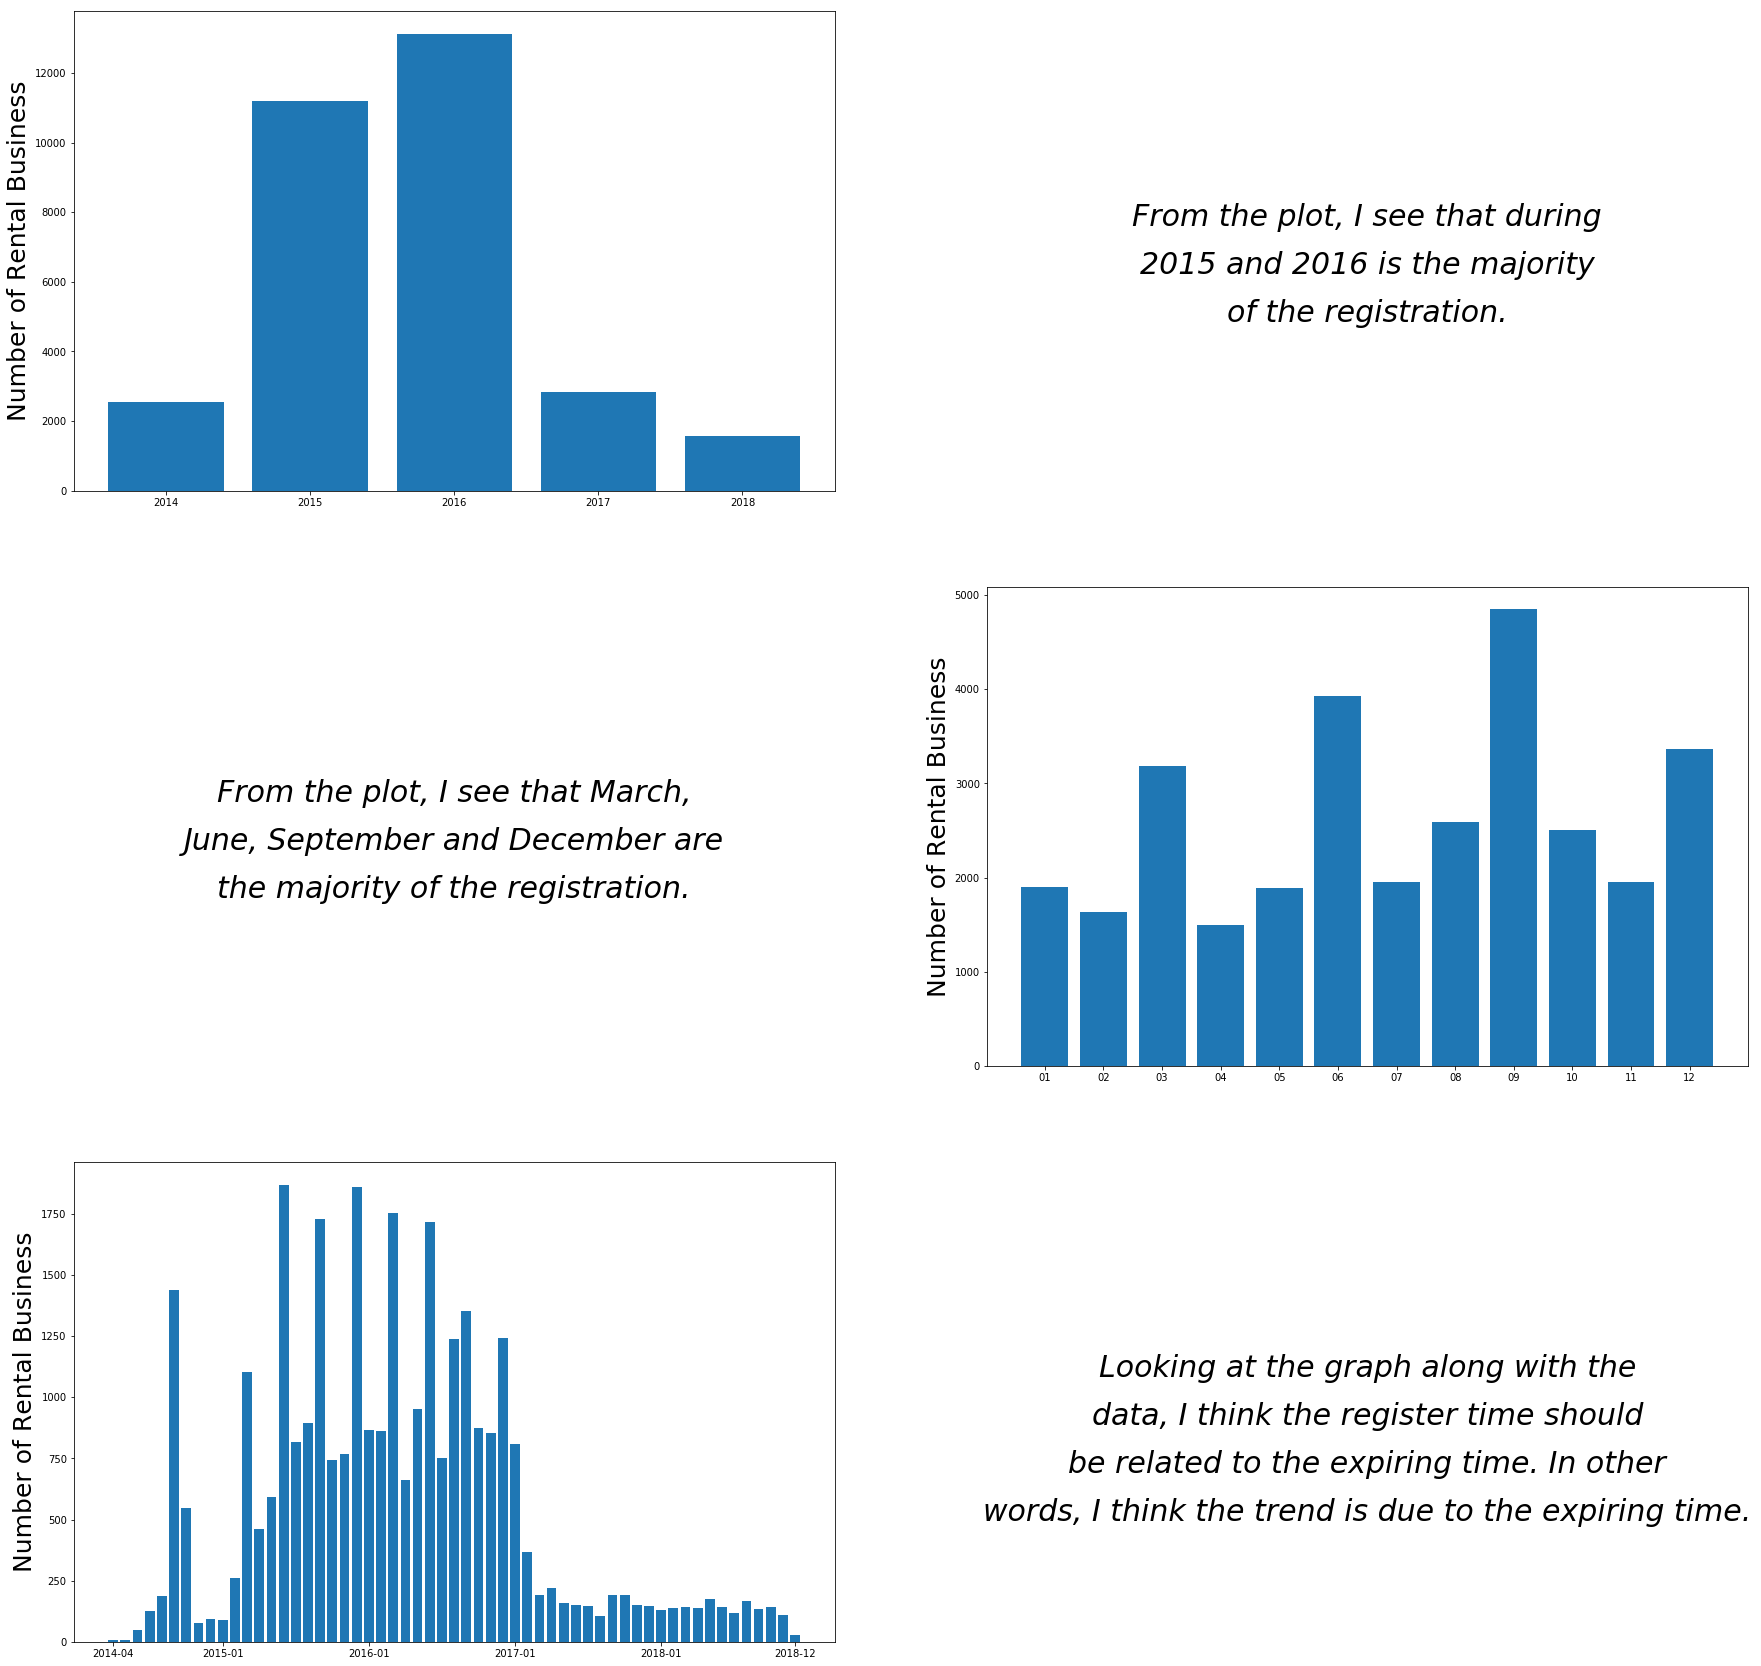

In [50]:
plt.figure(figsize=(30,30))
plt.subplot(3,2,1)
plt.bar(Year.index, Year, 0.8)
plt.ylabel('Number of Rental Business',fontsize=25)
plt.subplot(3,2,2)
plt.axis([0, 10, 0, 10])
plt.axis('off')
t1 = ("From the plot, I see that during" )
t2=     ("2015 and 2016 is the majority")
t3=     ("of the registration.")
plt.text(5, 6, t1, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 5, t2, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 4, t3, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.subplot(3,2,4)
plt.bar(Month.index, Month, 0.8)
plt.ylabel('Number of Rental Business',fontsize=25)
plt.subplot(3,2,3)
plt.axis([0, 10, 0, 10])
plt.axis('off')
t4 = ("From the plot, I see that March,") 
t5 =("June, September and December are") 
t6 =("the majority of the registration.")
plt.text(5, 6, t4, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 5, t5, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 4, t6, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.subplot(3,2,5)
z=plt.bar(Time.index, Time, 0.8)
plt.ylabel('Number of Rental Business',fontsize=25)
forbar=['2014-04',  '2015-01', '2016-01', '2017-01', '2018-01',  '2018-12']
plt.xticks(forbar)
z
plt.subplot(3,2,6)
plt.axis([0, 10, 0, 10])
plt.axis('off')
t4 = ("Looking at the graph along with the") 
t5 =("data, I think the register time should") 
t6 =("be related to the expiring time. In other")
t7 =("words, I think the trend is due to the expiring time.")
plt.text(5, 6, t4, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 5, t5, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 4, t6, fontsize=30, style='oblique', ha='center',va='top', wrap=True)
plt.text(5, 3, t7, fontsize=30, style='oblique', ha='center',va='top', wrap=True)

## Logistic Prediction
### By using the month &amp; year, I would like to build a model that I can use to predict a ZIP. In other <br />
### words, when I get a data that indicates the registered time, I can predict where it is going to be.

#### First, I read all the data into a testing model.

In [83]:
encoded_M = pd.DataFrame(label_encoder.fit_transform(Z['RegisteredYear']))
encoded_Y = pd.DataFrame(label_encoder.fit_transform(Z['RegisteredMonth']))
encoded_ZIP = pd.DataFrame(label_encoder.fit_transform(Z['OriginalZip']))
Z_test = pd.concat([encoded_M,encoded_Y,encoded_ZIP], axis=1)
Z_test.columns=['M','Y','ZIP']
X_train, X_test, y_train, y_test = train_test_split(Z_test[['M','Y']], Z_test[['ZIP']], test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

D:\program\Anaconda3\envs\py35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\program\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
D:\program\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


#### Next, build the logistic model.

In [84]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train['ZIP'].values)

D:\program\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Last, I check the ratio of error.

In [85]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v!= y_test['ZIP'].values[i]:
        error+=1
Rateoferror=error/len(encoded_ZIP ) 
print('The rate of error is {}'.format(Rateoferror))

The rate of error is 0.2449606450374352


# Conclusion
## Along with the project, I have several findings.
## 1.
> Most of the rental business are in the North part of Seattle. In addtion, when the supply is more, the price can be lower.<br />
So if someone is looking for a cheaper apartment, I will recommend those areas. On the other hand, there are less rental<br /> businesses in the downtown area, which is understandable. The reason is that downtown is more like a finacial district. So<br /> there should be more offices instead of living spaces.
## 2.
> Through out the time, I see that during 2015 &amp; 2016 is the majority of registration. I assume that there is going <br />to have another peak in 2020 &amp; 2021. The reason is that the license will expire in 5 years. In addition, I think <br />that there was also a peak in 2010 &amp; 2011. On the other hand, I found that most of the registration happened in <br />March, June, September, and December, which matches each quarter of the year.
## 3.
> Lastly, a model is built to predict where the registration will be base on the time on registration. Since the businesses<br />should register before expiration, they should register at the similar time. Though the model has a 24% of error, if data<br />continued to update, I will be able to reduce the error. 
